# <font color=darkred>Laboratory 14: Differentiation and Integration </font>

In [2]:
# Preamble script block to identify host, user, and kernel
import sys
! hostname
! whoami
print(sys.executable)
print(sys.version)
print(sys.version_info)

afam-MS-7B17
afam
/home/afam/anaconda3/bin/python
3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 15:12:24) [GCC 11.2.0]
sys.version_info(major=3, minor=12, micro=4, releaselevel='final', serial=0)


## Full name: 
## R#: 
## Title of the notebook: Loops, Looops, Loooooops
## Date:
___

In this lab you explore which tools and libraries are available in Python to compute derivatives and integrals. You will perform symbolic differentiation and integration with `SymPy` library and numerical differentiation and integration with `NumPy`.

## SymPy: Symbolic Mathematics in Python

**SymPy** is a Python library for symbolic mathematics. It is designed to work with mathematical expressions symbolically, rather than numerically, which means it can perform algebraic manipulations, calculus operations, solve equations analytically, and more.

### Example Usage

```python
from sympy import symbols, diff, integrate, solve, Eq

# Define symbols
x, y = symbols('x y')

# Differentiate
diff_expr = diff(x**3 + 2*x**2, x)

# Integrate
integral_expr = integrate(x**2 + 3*x + 2, x)

# Solve algebraic equation
solution = solve(x**2 - 4, x)

# Solve system of equations
equation1 = Eq(2*x + 3*y, 1)
equation2 = Eq(3*x + y, 2)
solution_system = solve((equation1, equation2), (x, y))


### Symbolic computation
Symbolic computation deals with the computation of mathematical objects that are represented exactly, not approximately (e.g. $\sqrt{2}$ will be written as it is, not as $1.41421356237$). <br>
If you want to compute the approximate decimal value of $\sqrt{18}$, you could normally do it in the following way:

In [7]:
import math

math.sqrt(18)

4.242640687119285

The output $4.242640687119285$ is an approximate result. You may recall that $\sqrt{18} = \sqrt{9 \cdot 2} = 3\sqrt{2}$ and see that it is pretty much impossible to deduct it from the approximate result. But with the symbolic computation systems the roots are not approximated with a decimal number but rather only simplified, so the output is exact:

In [9]:
# This format of module import allows to use the sympy functions without sympy. prefix.
from sympy import *

# This is actually sympy.sqrt function, but sympy. prefix is omitted.
sqrt(18)

3*sqrt(2)

Numerical evaluation of the result is available, and you can set number of the digits to show in the approximated output:

In [11]:
N(sqrt(18),8)

4.2426407

### Using Symbols
In `SymPy` variables are defined using **symbols**. In this particular library they need to be predefined (a list of them should be provided). Have a look in the cell below, how the symbolic expression, correspoinding to the mathematical expression $2x^2 - xy$, is defined:

In [13]:
# List of symbols.
x, y = symbols('x y')
# Definition of the expression.
expr = 2 * x**2 - x * y
expr

2*x**2 - x*y

Now you can perform various manipulations with this expression: add or subtract some terms, multiply by other expressions etc., just like if you were doing it by hands:

In [15]:
expr_manip = x * (expr)
expr_manip

x*(2*x**2 - x*y)

You can also expand the expression:

In [17]:
expand(expr_manip)

2*x**3 - x**2*y

Or factorise it:

In [19]:
factor(expr_manip)

x**2*(2*x - y)

### Evaluating values
To substitute particular values for the variables in the expression, you can use the following code:

In [21]:
expr.evalf(subs={x:-1, y:2})

4.00000000000000

In [22]:
expr_manip.evalf(subs={x:-1, y:2})

-4.00000000000000

This can be used to evaluate a function $f\left(x\right) = x^2$:

In [24]:
f_symb = x ** 2
f_symb.evalf(subs={x:3})

9.00000000000000

### Using Numpy Arrays
You might be wondering now, is it possible to evaluate the symbolic functions for each element of the array? At the beginning of the lab you have defined a `NumPy` array `x_array`:

In [26]:
import numpy as np
x_array = np.arange(1,4)
print(x_array)

[1 2 3]


Now try to evaluate function `f_symb` for each element of the array. You will get an error:

In [28]:
try:
    f_symb(x_array)
except TypeError as err:
    print(err)

'Pow' object is not callable


It is possible to evaluate the symbolic functions for each element of the array, but you need to make a function `NumPy`-friendly first:

In [30]:
from sympy.utilities.lambdify import lambdify

f_symb_numpy = lambdify(x, f_symb, 'numpy')

The following code should work now:

In [32]:
print("x: \n", x_array)
print("f(x) = x**2: \n", f_symb_numpy(x_array))

x: 
 [1 2 3]
f(x) = x**2: 
 [1 4 9]


`SymPy` has lots of great functions to manipulate expressions and perform various operations from calculus. More information about them can be found in the official documentation [here](https://docs.sympy.org/).

### Symbolic Differentiation and Integration with `SymPy`

**Symbolic Differentiation** refers to the process of computing the derivative of a function symbolically, providing an exact expression for the rate of change of the function. Unlike numerical differentiation, which approximates derivatives using discrete data points, symbolic differentiation yields a precise mathematical formula for the derivative. <br>
Let's try to find a derivative of a simple power function using `SymPy`:

In [35]:
f = x**3
f

x**3

In [36]:
diff(f)

3*x**2

Some standard functions can be used in the expression, and `SymPy` will apply required rules (sum, product, chain) to calculate the derivative:

In [38]:
dfdx_composed = diff(exp(-2*x) + 3*sin(3*x), x)
dfdx_composed

9*cos(3*x) - 2*exp(-2*x)

Now calculate the derivative of the function `f_symb` defined in [2.1](#2.1) and make it `NumPy`-friendly:

In [40]:
dfdx_symb = diff(f_symb, x)
dfdx_symb_numpy = lambdify(x, dfdx_symb, 'numpy')

Evaluate function `dfdx_symb_numpy` for each element of the `x_array`:

In [42]:
print("x: \n", x_array)
print("f'(x) = 2x: \n", dfdx_symb_numpy(x_array))

x: 
 [1 2 3]
f'(x) = 2x: 
 [2 4 6]


You can apply symbolically defined functions to the arrays of larger size. The following code will plot function and its derivative, you can see that it works:

In [44]:
x_arr = np.linspace(-4,2*np.pi,360)# the NumPy function np.linspace is similar to the range()
x_arr[0:10]

array([-4.        , -3.97135603, -3.94271206, -3.91406809, -3.88542412,
       -3.85678015, -3.82813618, -3.79949221, -3.77084824, -3.74220427])

In [45]:
f_sym = 2 * sin(x)**3
f_sym

2*sin(x)**3

In [46]:
# Make symbolic functions numpy friendly
f_symb_numpy = lambdify(x, f_symb, 'numpy')

In [47]:
dfdx_symb = diff(f_sym, x)
dfdx_symb 

6*sin(x)**2*cos(x)

In [48]:
# Make differenciation of symbolic functions numpy friendly
dfdx_symb_numpy = lambdify(x, dfdx_symb, 'numpy')

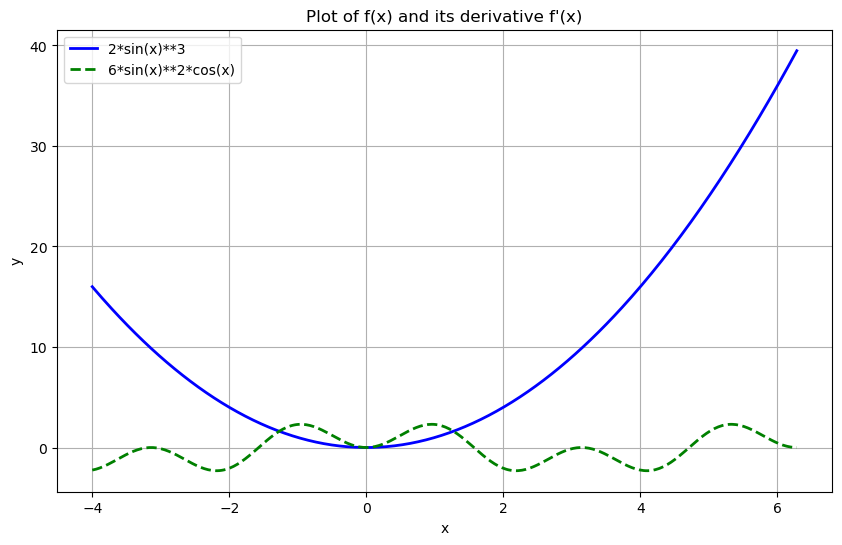

In [49]:
import matplotlib.pyplot as plt
# Plotting the functions
plt.figure(figsize=(10, 6))
plt.plot(x_arr, f_symb_numpy(x_arr), label=f_sym, color='blue', linestyle='-', linewidth=2)
plt.plot(x_arr , dfdx_symb_numpy(x_arr), label=dfdx_symb, color='green', linestyle='--', linewidth=2)

# Adding labels, legend, and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of f(x) and its derivative f\'(x)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


**Symbolic Integration** refers to the process of finding the integral of a function in its exact mathematical form, rather than approximating it numerically. This type of integration provides an exact expression for the antiderivative of a function, which can be used to compute areas, solve differential equations, and perform various mathematical analyses.

For example we couls be given the function $( f(x) = \sin(x) $), we can find its indefinite integral and evaluate the definite integral from $( x = 0 $) to $( x = \pi $)

In [52]:
import sympy as sp
# Define the symbol
x = sp.symbols('x')

In [53]:
# Define the function to integrate
f = sp.sin(x)
f

sin(x)

In [54]:
# Perform symbolic integration
integral_f = sp.integrate(f, x)
integral_f 

-cos(x)

In [55]:
# Evaluate the definite integral from 0 to pi
definite_integral = sp.integrate(f, (x, 0, sp.pi))
print(f"Definite integral of sin(x) from 0 to pi: {definite_integral}")

Definite integral of sin(x) from 0 to pi: 2


### Exercise 14.0: (20 Marks)
Given a function $( f(x) = x^2 \sin(x) $), perform symbolic integration to find its indefinite integral. Then, evaluate the definite integral of $( f(x) $) over the interval $( x = 0 $) to $( x = 2\pi $). Finally, plot both the original function and its indefinite integral over the interval $( x = 0 $) to $( x = 2\pi $) using Python.


In [ ]:
#Integration

In [ ]:
# Plot

___
### Numerical Differentiation

Numerical differentiation refers to methods for estimating the derivative of a function based on discrete data points. Unlike symbolic differentiation (such as what SymPy performs), numerical differentiation uses approximation techniques to estimate derivatives when you don’t have a symbolic expression but only numerical data or values of a function at specific points.
Based on that idea there are different approaches for the numerical approximations, which somehow vary in the computation speed and accuracy. However, for all of the methods the results are not accurate - there is a round off error. At this stage there is no need to go into details of various methods, it is enough to investigate one of the numerial differentiation functions, available in `NumPy` package.
This method does not take into account the function expression. The only important thing is that the function can be evaluated in the nearby points $x$ and $x+\Delta x$, where $\Delta x$ is sufficiently small. Then $\frac{df}{dx}\approx\frac{f\left(x + \Delta x\right) - f\left(x\right)}{\Delta x}$, which can be called a **numerical approximation** of the derivative. 

#### Common Methods for Numerical Differentiation
1. **Finite Differences**:  
   This method approximates the derivative using values of the function at nearby points. There are three main types:
   - Forward Difference   
   - Backward Difference
   - Central Difference
2. **Higher-Order Approximations**:  
   These methods are more accurate and use additional points around \( x \) to approximate the derivative.
3. **Richardson Extrapolation**:  
   A technique to improve the accuracy of finite difference approximations.

### Forward Difference for Numerical Differentiation

**Forward Difference** is a method used to approximate the derivative of a function using numerical techniques. This method is particularly useful when you don't have the explicit derivative of a function but need to estimate it based on discrete points or numerical data.

#### Formula
The **Forward Difference** approximation of a derivative is given by:
$$
f'(x) \approx \frac{f(x+h) - f(x)}{h}
$$
where:
- $( f'(x) $) is the approximate derivative of $( f(x) $),
- $( h $) is a small step size (the difference between two points),
- $( f(x) $) and $( f(x+h) $) are the function values at $( x $) and $( x+h $), respectively.

#### Concept

In this method, we estimate the slope of the tangent to the curve at point $( x $) by calculating the slope of the line (secant) between $( x $) and a nearby point $( x+h $). The smaller the value of $( h $), the closer the line between $( x $) and $( x+h $) will be to the actual tangent, making the approximation more accurate.

#### Key Points

- **Step Size $( h $)**: The step size $( h $) should be small to improve accuracy, but if it's too small, it can introduce numerical errors due to limited precision in floating-point calculations.
- **One-sided Approximation**: Unlike other methods (e.g., central difference), the forward difference only looks at values ahead of $( x $), which makes it less accurate but easier to compute in some situations.
- **Applications**: This method is useful in scenarios where you have a function represented by discrete data points (e.g., experimental data) or when computing derivatives symbolically is difficult.

#### Example
Here’s a Python example demonstrating the **Forward Difference** method of finite differences for numerical differentiation.
If you have a function like $( f(x) = sin(x) $) and you want to approximate its derivative at $( x = pi/4 $), the forward difference method will calculate the slope between $( sin(pi/4) $) and $( sin(pi/4 + h) $) using a small value of $( h $), such as $( 1e-5 $).

The result will approximate the derivative of $( sin(x) $), which is $( cos(x) $). For $( x = pi/4 $), this value should be close to $( cos(pi/4) = 0.7071 $).



## Exercise 14.1 :    (20 Marks)
Given the function $( f(x) = \sin(x) $), how can you approximate its derivative at $( x = \frac{\pi}{4} $) using the Forward Difference method? Calculate the slope between $( \sin\left(\frac{\pi}{4}\right) $) and $( \sin\left(\frac{\pi}{4} - h\right) $), where $( h $) is a small value, such as $( 1 \times 10^{-5} $). Plot the slope.


In [62]:
#differentiation


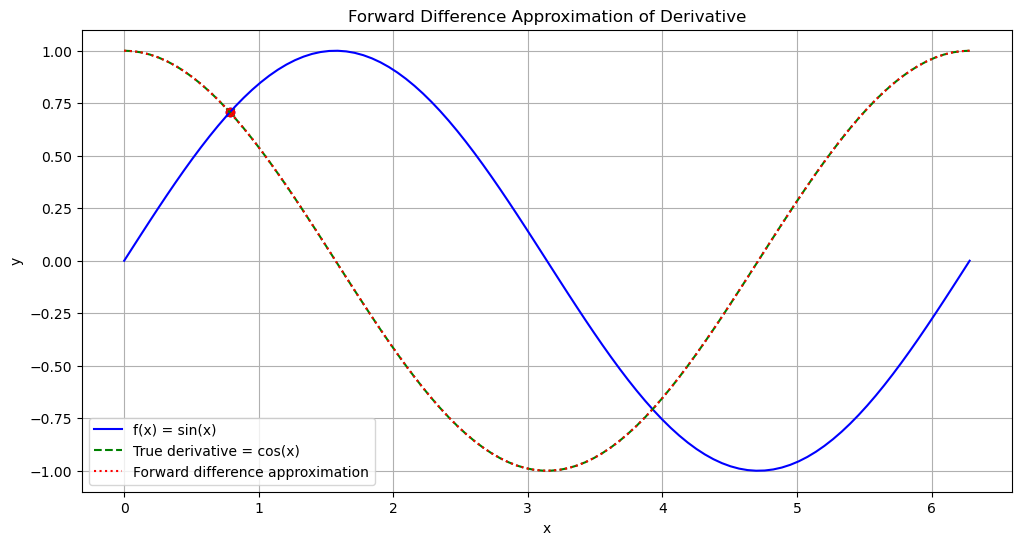

In [63]:
#plot


### Backward Difference for Numerical Differentiation

**Backward Difference** is a numerical method used to approximate the derivative of a function. This method is especially useful when you have discrete data points and need to estimate the derivative at a specific point.

#### Formula
The **Backward Difference** approximation of a derivative is given by:
$$
f'(x) \approx \frac{f(x) - f(x-h)}{h}
$$
where:
- $( f'(x) )$ is the approximate derivative of $( f(x) )$,
- $( h )$ is a small step size (the difference between two points),
- $( f(x) )$ and $( f(x-h) )$ are the function values at$ ( x ) and ( x-h )$, respectively.

#### Concept
In this method, we estimate the slope of the tangent to the curve at point \( x \) by calculating the slope of the line (secant) between \( x \) and a nearby point \( x-h \). The smaller the value of \( h \), the closer the line between \( x \) and \( x-h \) will be to the actual tangent, improving the accuracy of the approximation.

#### Key Points:
- **Step Size \( h \)**: The step size \( h \) should be small to enhance accuracy. If \( h \) is too small, it can cause numerical errors due to the limitations of floating-point precision.
- **One-sided Approximation**: Unlike other methods (e.g., central difference), the backward difference only uses data points behind \( x \), which makes it straightforward to compute but potentially less accurate.
- **Applications**: This method is useful when dealing with time series data or when the function values are known only at discrete points and you need to estimate the derivative using past values.

### Exercise 14.2: (20 Marks)
Given the function $( f(x) = \sin(x) $), how can you approximate its derivative at $( x = \frac{\pi}{4} $) using the backward difference method? Calculate the slope between $( \sin\left(\frac{\pi}{4}\right) $) and $( \sin\left(\frac{\pi}{4} - h\right) $), where $( h $) is a small value, such as $( 1 \times 10^{-5} $). Plot the slope.


In [66]:
# Backward Differentiation

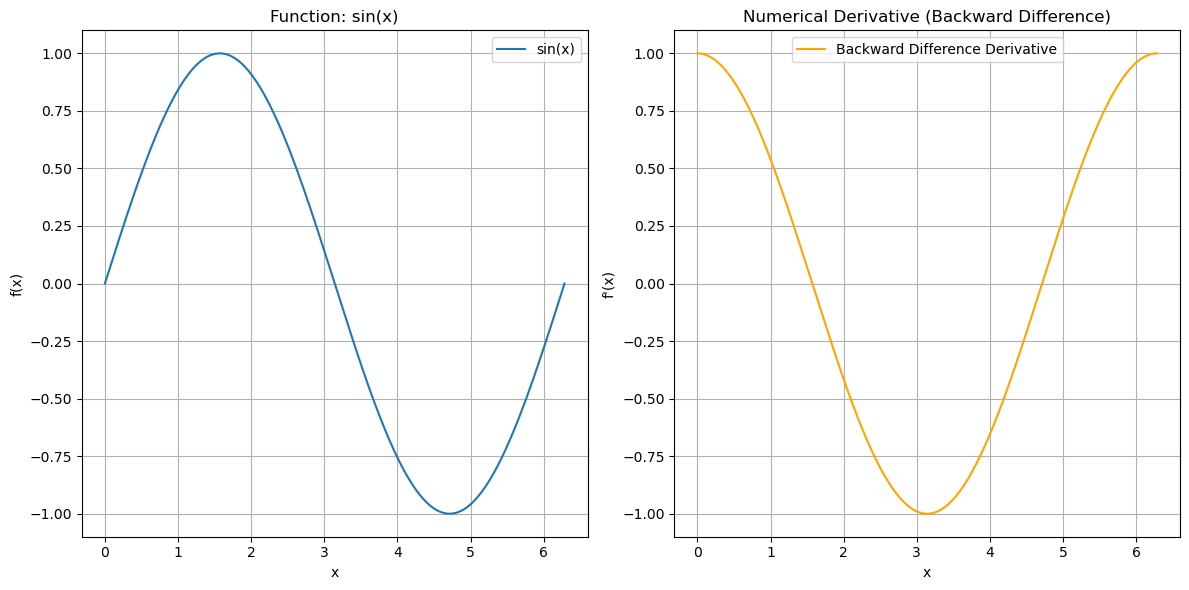

Backward difference approximation of the derivative of sin(x) at x = 0.7853981633974483 is approximately: 0.7071103167000102


In [67]:
# Plot

## Numerical Integration
**Numerical Integration** refers to techniques used to approximate the integral (or area under the curve) of a function when an exact analytical solution is difficult or impossible to obtain. It involves using numerical methods to estimate the value of definite integrals.
#### Key Concepts:
1. **Definite Integral**: The definite integral of a function \( f(x) \) from \( a \) to \( b \) is represented as:
   $$
   \int_a^b f(x) \, dx
   $$
   It represents the area under the curve \( f(x) \) between \( x = a \) and \( x = b \).

2. **Numerical Methods**: These methods provide approximate solutions to integrals by breaking the area under the curve into simpler shapes (like rectangles or trapezoids) and summing their areas. Common numerical integration methods include:

   - **Riemann Sums**: Approximates the area by dividing it into rectangles of width \( \Delta x \) and height \( f(x_i) \).
   - **Trapezoid Rule**: Approximates the area under the curve as a series of trapezoids and sums their areas.
   - **Simpson’s Rule**: Uses parabolic segments to approximate the area under the curve, providing better accuracy than the Trapezoid Rule.

3. **Applications**: Numerical integration is widely used in engineering, physics, statistics, and other fields where integrals appear in various models and calculations. It's particularly useful for functions that are complex or do not have a closed-form antiderivative.

## Trapezoid Method for Numerical Integration
The **Trapezoid Method** is a numerical technique used to approximate the definite integral of a function. It works by approximating the area under the curve as a series of trapezoids, rather than as a series of rectangles (as in the Riemann sum approach).

### Formula

The Trapezoid Rule approximates the integral of a function \( f(x) \) from \( a \) to \( b \) using the formula:

$$
\int_a^b f(x) \, dx \approx \frac{b - a}{2} \left( f(a) + f(b) \right)
$$

For \( n \) intervals (or subintervals), the formula becomes:

$$
\int_a^b f(x) \, dx \approx \frac{h}{2} \left[ f(x_0) + 2 \sum_{i=1}^{n-1} f(x_i) + f(x_n) \right]
$$

where:
- $( h = \frac{b - a}{n} )$ is the width of each subinterval,
- $( x_i = a + i \cdot h )$ are the points in the interval,
- $( f(x_i) )$ are the function values at these points.


 ### Exercise 14.3:    (20 Marks)
Using Trapezoid Method for Numerical Integration integrate the function $sin(x)$ from origin to $2*\pi$. Plot the result for 10 number of intervals and 100 number of intervals

In [ ]:
### Plotting the Result
import matplotlib.pyplot as plt

# Define the function to integrate
def f(x):
    return np.sin(x)  # Example: sin(x)

# Define the trapezoid rule method with plotting
def trapezoid_plot(f, a, b, n):
    x = np.linspace(a, b, n+1)
    y = f(x)
    
    # Compute trapezoid points
    x_trap = np.concatenate([x, [b]])
    y_trap = np.concatenate([y, [f(b)]])
    
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, 'b', label='f(x) = sin(x)')
    plt.fill_between(x_trap, y_trap, alpha=0.2, color='orange', label='Trapezoid Approximation')
    plt.title('Trapezoid Rule for Numerical Integration')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid(True)
    plt.show()


---
### Lab Exercise 14.4 (20 marks)
Ensure you entered your full name and R Number in the top cell<br>
Convert to PDF and submit both PDF and IPYNB
___